# Εισαγωγή βιβλιοθηκών

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch, VerticalPitch

# Εισαγωγή εικόνας

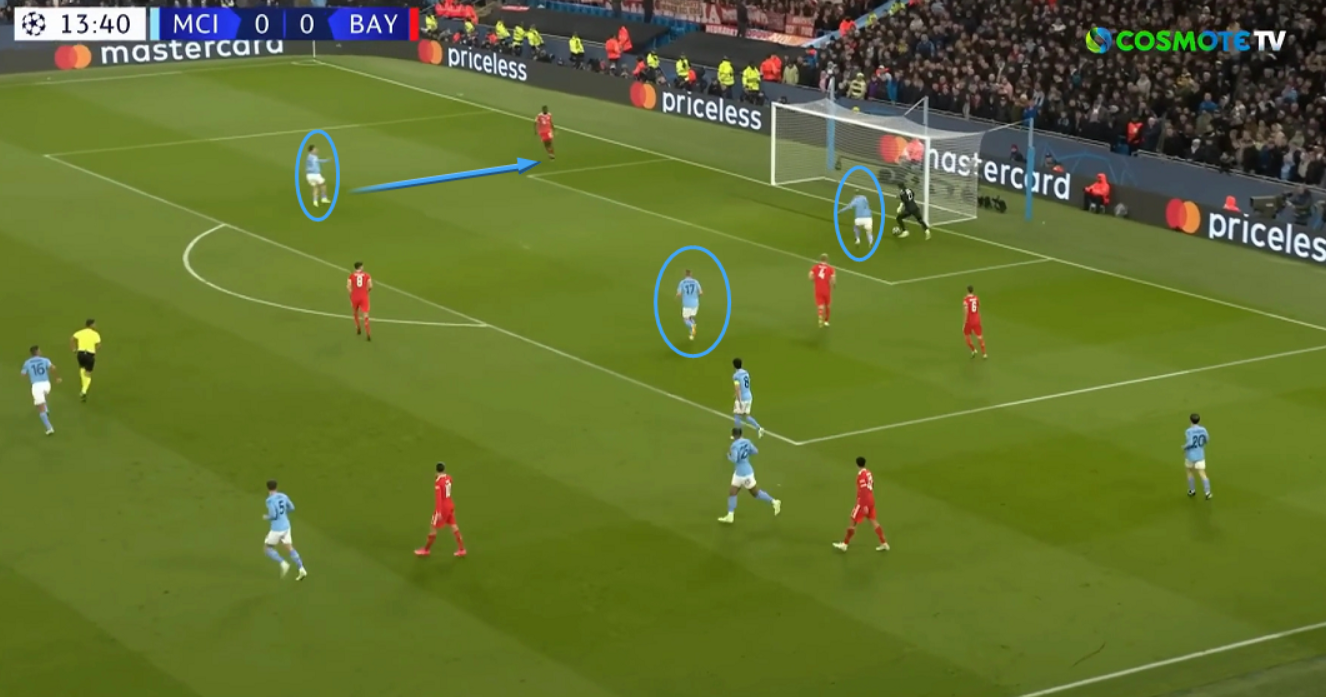

In [2]:
from IPython import display
display.Image('Man.City-Bayern, Press.png')

## Σχεδίαση αγωνιστικού χώρου

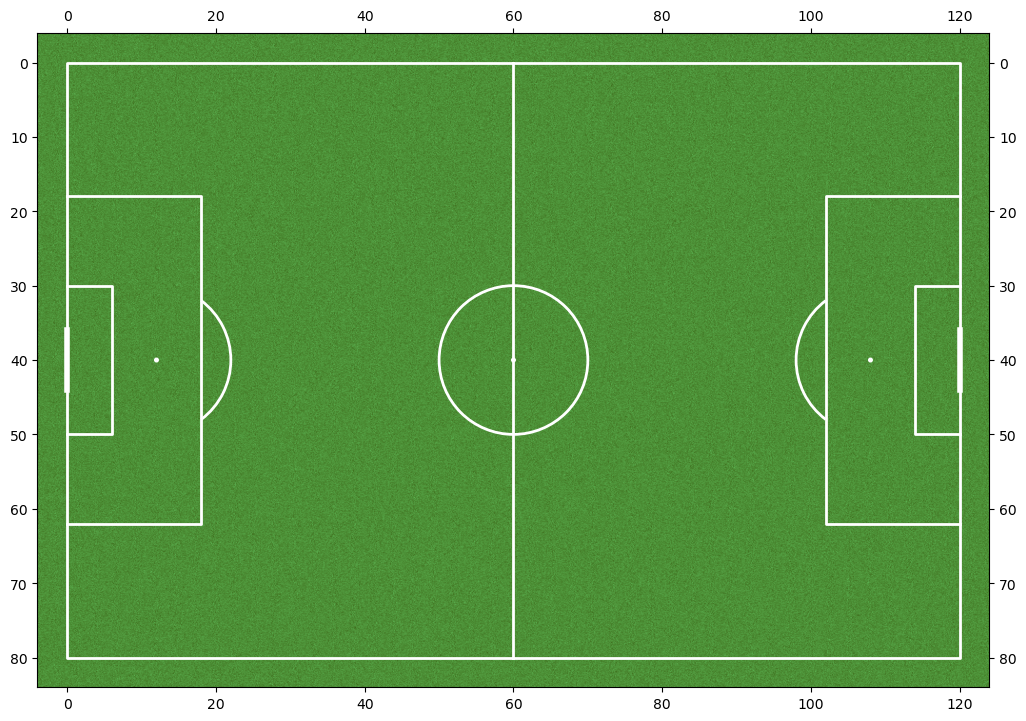

In [3]:
fig,ax = plt.subplots(figsize=(13, 8.5))
pitch = Pitch(pitch_color='grass', line_color='white',
             axis=True, label=True, tick=True)

pitch.draw(ax=ax)

## Δημιουργία λίστας με τις συντεταγμένες των παικτών στον αγωνιστικό χώρο

In [4]:
city_x = [115, 102, 107, 105, 105, 98, 87, 88]
city_y = [45.5, 62, 31, 55, 73, 70, 70, 55]
city = list(np.zeros((8,), dtype=float))

bayern_x = [118, 114, 109, 98, 110, 114, 98, 90, 99] 
bayern_y = [46, 30, 55, 48, 60, 70, 72, 70, 22]
bayern = list(np.ones((9,), dtype=int))

df = pd.DataFrame({
    'x':city_x+bayern_x,
    'y':city_y+bayern_y,
    'team':city+bayern
})

In [5]:
df

,x,y,team
0,115,45.5,0.0
1,102,62.0,0.0
2,107,31.0,0.0
3,105,55.0,0.0
4,105,73.0,0.0
5,98,70.0,0.0
6,87,70.0,0.0
7,88,55.0,0.0
8,118,46.0,1.0
9,114,30.0,1.0


### Συνδυασμός των στηλών x και y σε έναν πίνακα

In [6]:
points = np.column_stack((df.x,df.y))
points

array([[115. ,  45.5],
       [102. ,  62. ],
       [107. ,  31. ],
       [105. ,  55. ],
       [105. ,  73. ],
       [ 98. ,  70. ],
       [ 87. ,  70. ],
       [ 88. ,  55. ],
       [118. ,  46. ],
       [114. ,  30. ],
       [109. ,  55. ],
       [ 98. ,  48. ],
       [110. ,  60. ],
       [114. ,  70. ],
       [ 98. ,  72. ],
       [ 90. ,  70. ],
       [ 99. ,  22. ]])

## Σχεδιασμός 2D όψης και διάγραμμα Voronoi της φάσης

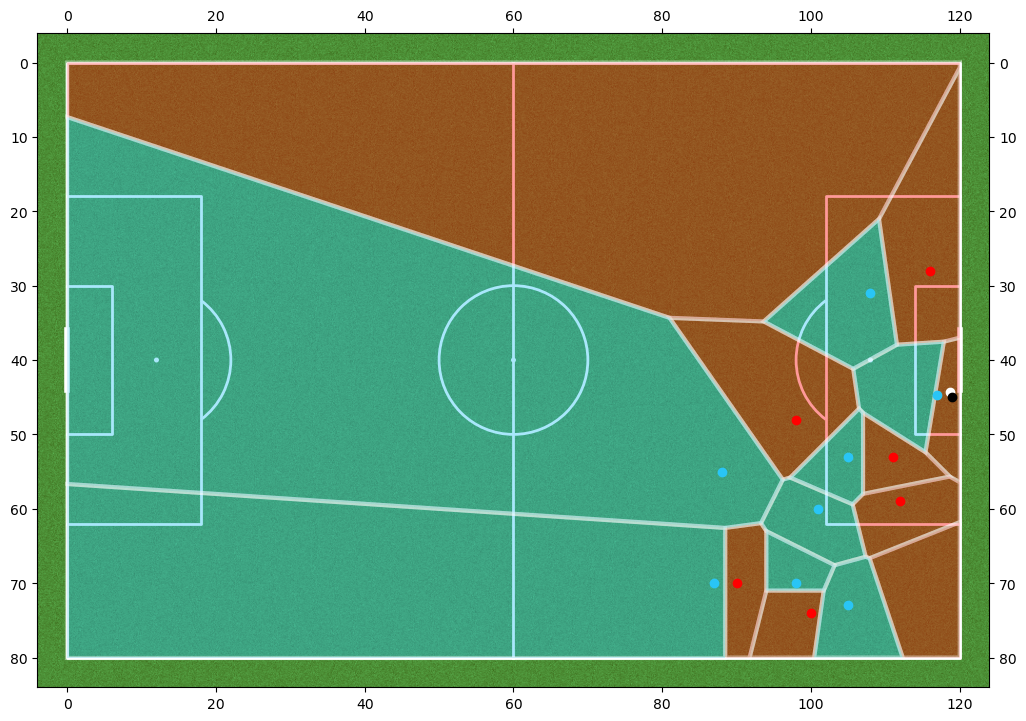

In [7]:
fig,ax = plt.subplots(figsize=(13, 8.5))
pitch = Pitch(pitch_color='grass', line_color='white',
             axis=True, label=True, tick=True)

pitch.draw(ax=ax)

# Voronoi
x=df.x
y=df.y
team1, team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1, ax=ax, fc='red', ec='white', lw=3, alpha=.4)
t2 = pitch.polygon(team2, ax=ax, fc='#29C5F6', ec='white', lw=3, alpha=.4)


# Manchester City
pitch.scatter(117, 44.75, ax=ax, color='#29C5F6') # Haaland
pitch.scatter(101, 60, ax=ax, color='#29C5F6') # Gundogan
pitch.scatter(108, 31, ax=ax, color='#29C5F6') # Grealish
pitch.scatter(105, 53, ax=ax, color='#29C5F6') # De Bruyne
pitch.scatter(105, 73, ax=ax, color='#29C5F6') # Bernardo
pitch.scatter(98, 70, ax=ax, color='#29C5F6') # Akanji
pitch.scatter(87, 70, ax=ax, color='#29C5F6') # Stones
pitch.scatter(88, 55, ax=ax, color='#29C5F6') # Rodri

# Μπάλα
pitch.scatter(118.75, 44.25, ax=ax, color='white')

# Bayern
pitch.scatter(119, 45, ax=ax, color='black') # Sommer
pitch.scatter(116, 28, ax=ax, color='red') # Upamecano
pitch.scatter(111, 53, ax=ax, color='red') # De Ligt
pitch.scatter(98, 48, ax=ax, color='red') # Goretzka
pitch.scatter(112, 59, ax=ax, color='red') # Kimmich
# pitch.scatter(114, 70, ax=ax, color='red') # Davies
pitch.scatter(100, 74, ax=ax, color='red') # Musiala
pitch.scatter(90, 70, ax=ax, color='red') # Sane
# pitch.scatter(99, 22, ax=ax, color='red') # Pavard